In [1]:
# Data manipulation libraries
import numpy as np
np.random.seed(1881)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

# calculating the geographical distance
from geopy.distance import geodesic

# Modelling
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.utils.class_weight import compute_class_weight

# Settings for better notebook visualisation
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False) 
pd.set_option('display.float_format', '{:.4f}'.format)
import warnings
warnings.filterwarnings('ignore')

# 1. Introduction

## 1.1. Problem Statement

Credit card fraud is a serious issue that causes significant financial losses for both individuals and financial institutions. This type of fraud leads to billions of dollars in damages each year, and preventing it is critical for both customer security and the protection of banks' financial structures. Since credit card transactions are performed frequently and at high volumes by users, detecting fraudulent transactions through traditional methods has become quite challenging. At this point, machine learning algorithms and big data analytics provide an effective solution for the early detection and prevention of fraudulent activities.

Our dataset consists of credit card transactions made by users. In this project, I will examine the relevant dataset and develop a machine learning model to detect fraudulent transactions.

## 1.2. Project Objective

The goal of this project is to develop the best-performing model for detecting credit card fraud using machine learning techniques. Specifically:

* **Fraud detection:** To build a model that classifies whether the transactions in the dataset are legitimate or fraudulent.
* **Comparison of different models:** Compare the performance of different machine learning models such as **Catboost, XGBoost and LightGBM.**
* **Use of evaluation metrics:** Instead of accuracy, evaluate the models using more meaningful metrics like precision, recall, F1-score, and ROC AUC, considering class imbalance.

# 2. Data Exploration

## 2.1. Columns and Their Descriptions

* **`trans_date_trans_time`:** Timestamp of the transaction.
* **`cc_num`:** Credit card number (encrypted).
* **`merchant`:** The store or vendor where the transaction occurred.
* **`category`:** Transaction category (e.g., groceries, entertainment).
* **`amt`:** Transaction amount.
* **`first`:** Cardholder's first name. 
* **`last`:** Cardholder's last name.
* **`gender`:** Cardholder's gender.
* **`street`:** Street where the cardholder resides.
* **`city`:** City where the cardholder resides.
* **`state`:** State where the cardholder resides.
* **`zip`:** Postal code of the cardholder.
* **`lat`:** Latitude of the cardholder's address.
* **`long`:** Longitude of the cardholder's address.
* **`city_pop`:** Population of the city where the transaction occurred.
* **`job`:** Cardholder's occupation.
* **`dob`:** Cardholder's date of birth.
* **`trans_num`:** Unique transaction number.
* **`unix_time`:** Unix timestamp of the transaction.
* **`merch_lat`:** Latitude of the merchant's location.
* **`merch_long`:** Longitude of the merchant's location.
* **`is_fraud`:** Indicates whether the transaction is fraudulent. This is the target feature I will predict.
* **`merch_zipcode`:** Merchant's postal code.

## 2.2. Explatory Data Analysis

I am going to examine the first 5 rows of our dataset to understand its structure.

In [2]:
data = pd.read_csv('/kaggle/input/credit-card-transactions-dataset/credit_card_transactions.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0,28705.0000
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0,83236.0000
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.9600,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.6750,-78.6325,0,22844.0000


Let's check the size of our dataset.

In [3]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 1296675
Number of columns: 24


Exploring the datatypes.

In [4]:
data_types = pd.DataFrame(data.dtypes).reset_index()
data_types.columns = ['Feature Name', 'Data Type'] 
data_types

,Feature Name,Data Type
0,Unnamed: 0,int64
1,trans_date_trans_time,object
2,cc_num,int64
3,merchant,object
4,category,object
5,amt,float64
6,first,object
7,last,object
8,gender,object
9,street,object


Examining if there is any missing data.

In [5]:
missing_counts = data.isnull().sum()
missing_counts_df = pd.DataFrame(missing_counts).reset_index()
missing_counts_df.columns = ['Feature', 'Missing Value Count']
missing_counts_df

,Feature,Missing Value Count
0,Unnamed: 0,0
1,trans_date_trans_time,0
2,cc_num,0
3,merchant,0
4,category,0
5,amt,0
6,first,0
7,last,0
8,gender,0
9,street,0


Checking the number of unique values in each column.

In [6]:
unique_counts = data.nunique()
unique_counts_df = pd.DataFrame(unique_counts).reset_index()
unique_counts_df.columns = ['Feature', 'Number of Unique Values'] 
unique_counts_df

,Feature,Number of Unique Values
0,Unnamed: 0,1296675
1,trans_date_trans_time,1274791
2,cc_num,983
3,merchant,693
4,category,14
5,amt,52928
6,first,352
7,last,481
8,gender,2
9,street,983


Let's check if there is any duplications.

In [7]:
print(f'Number of duplicated rows: {data.duplicated().sum()}')

Number of duplicated rows: 0


## 2.3. Data Visualisation

Visualization of the distribution of the `is_fraud` column indicating fraud.

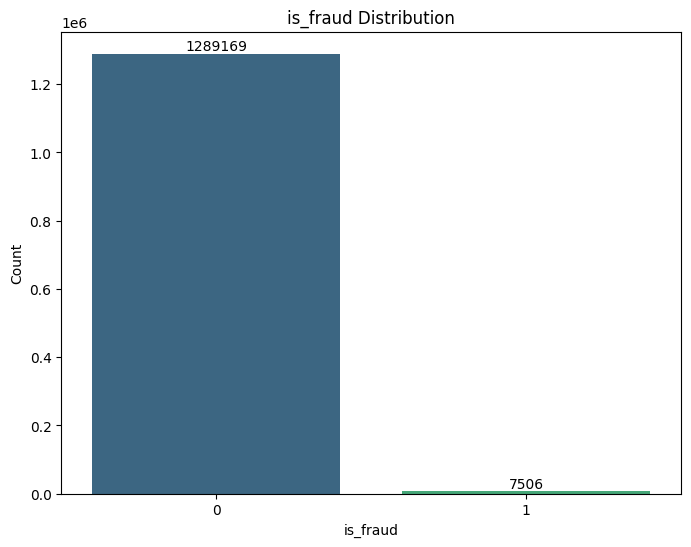

In [8]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='is_fraud', data=data, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black')
plt.title('is_fraud Distribution')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()

As you can see, our dataset has a quite imbalanced distribution. Only the **7506** of the data **(% 0.58)** are fraduent.

--

Visualization of the `is_fraud` distribution based on some categorical variables using a bar chart.

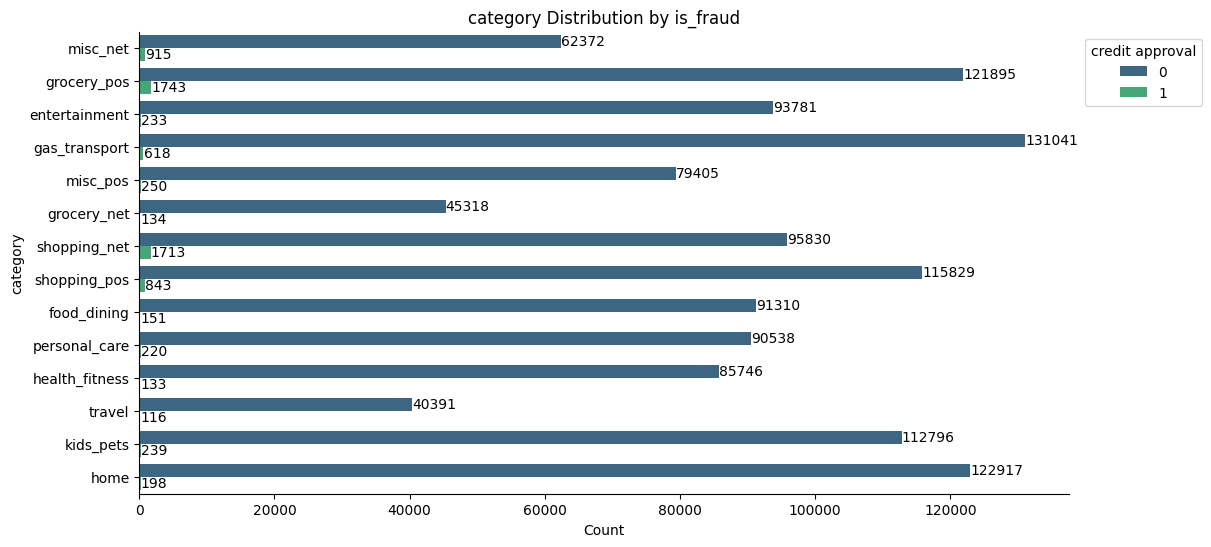

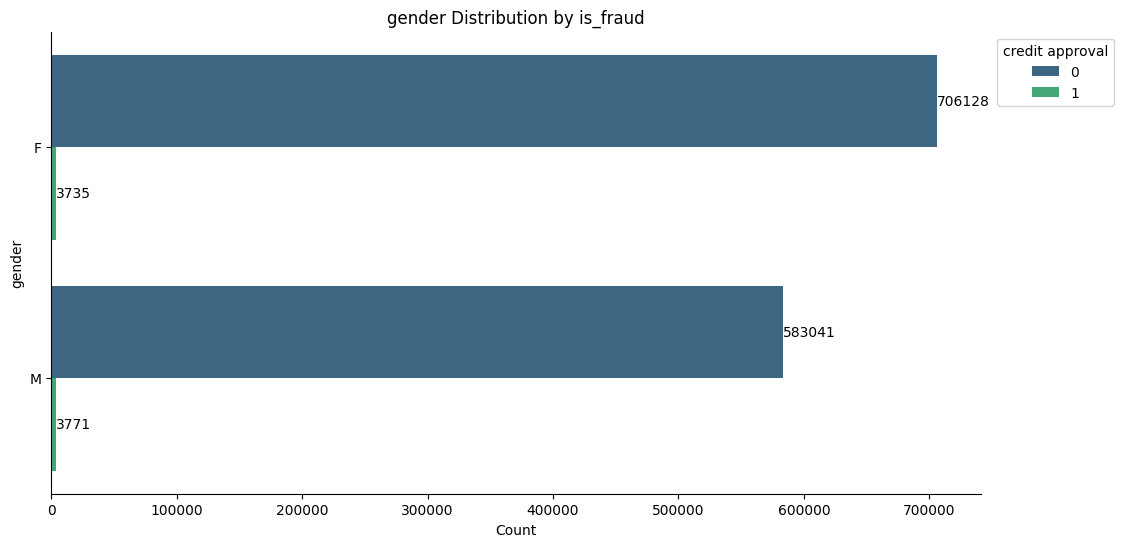

In [9]:
categorical_columns = ['category', 'gender']

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(y=column, hue='is_fraud', data=data, palette='viridis')
    plt.title(f'{column} Distribution by is_fraud')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.legend(title='credit approval', loc='upper right', bbox_to_anchor=(1.15, 1))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 10, p.get_y() + p.get_height() / 2, 
                f'{int(width)}', 
                ha='left', va='center')

    plt.show()

Let's plot the histograms for some of the numerical features.

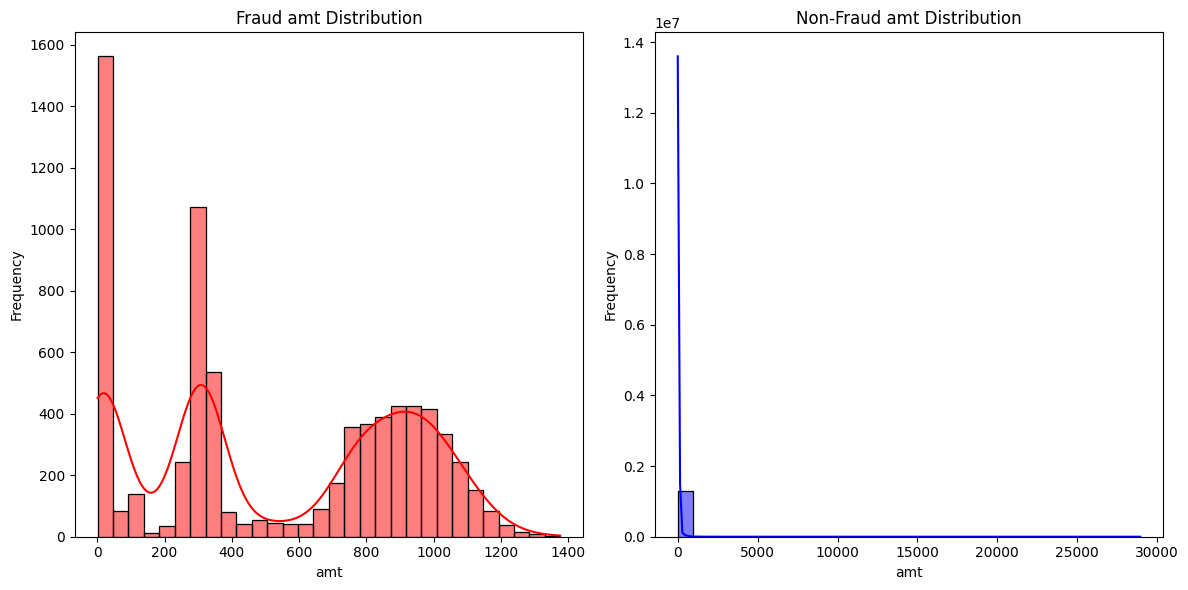

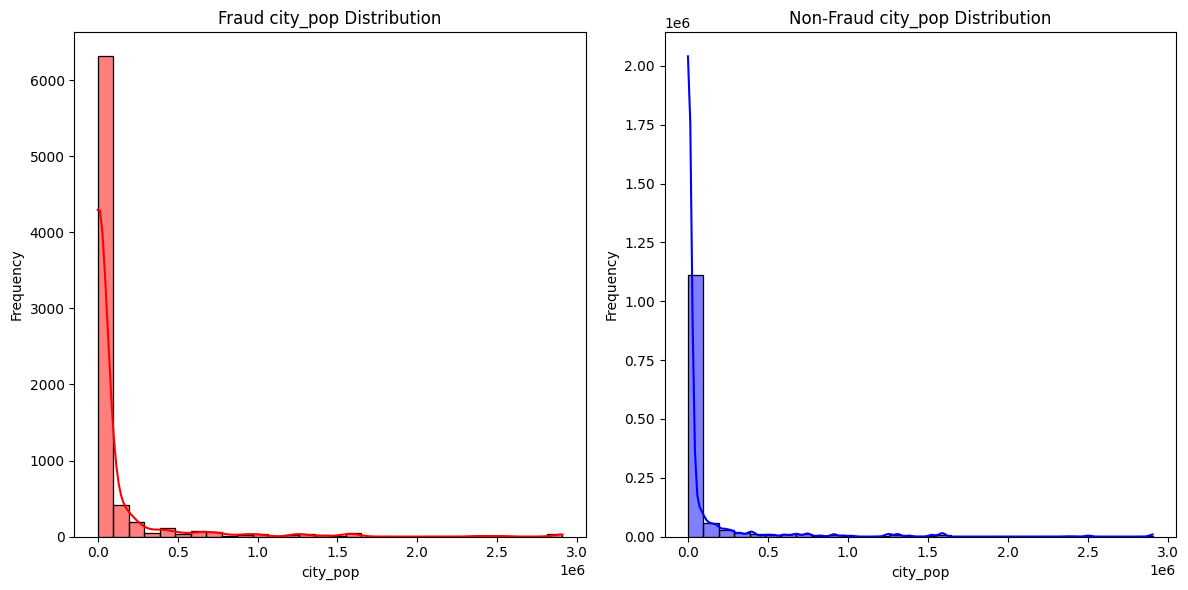

In [10]:
numeric_columns = ['amt', 'city_pop']

for column in numeric_columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data[data['is_fraud'] == 1][column], bins=30, kde=True, color='red')
    plt.title(f'Fraud {column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(data[data['is_fraud'] == 0][column], bins=30, kde=True, color='blue')
    plt.title(f'Non-Fraud {column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

Visualizing monthly and yearly fraud transactions.

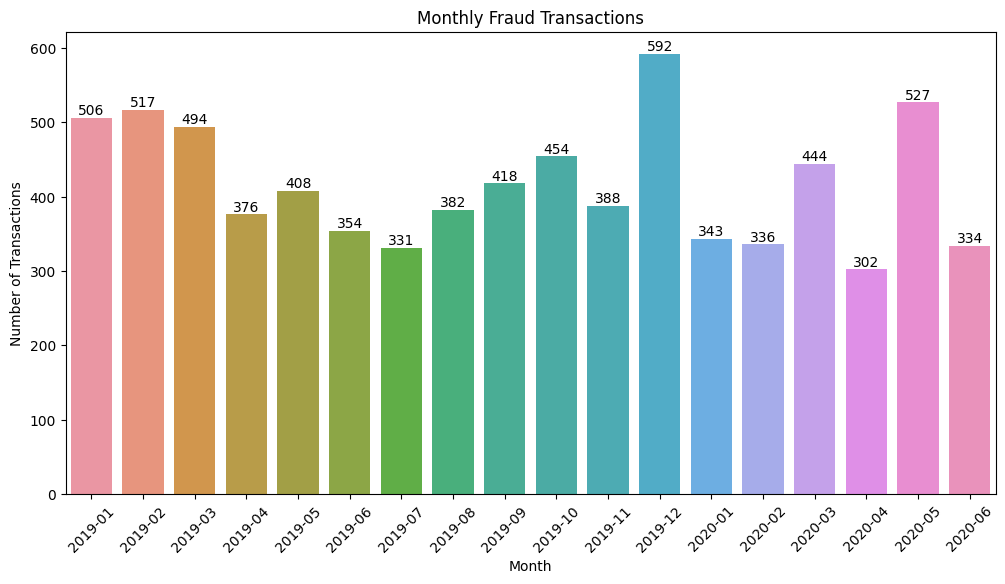

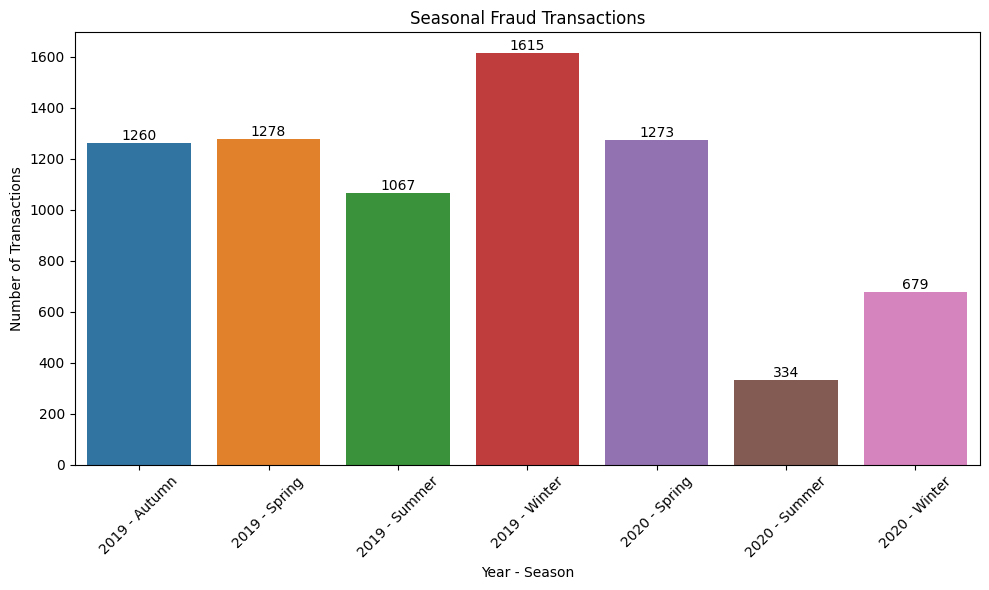

In [11]:
data_copy = data.copy()
fraud_transactions = data_copy[data_copy['is_fraud'] == 1]
non_fraud_transactions = data_copy[data_copy['is_fraud'] == 0]

fraud_transactions['trans_date_trans_time'] = pd.to_datetime(fraud_transactions['trans_date_trans_time'])
monthly_counts = fraud_transactions['trans_date_trans_time'].dt.to_period('M').value_counts().sort_index()
fraud_transactions['season'] = fraud_transactions['trans_date_trans_time'].dt.month % 12 // 3 + 1
fraud_transactions['year'] = fraud_transactions['trans_date_trans_time'].dt.year
fraud_transactions['year_season'] = fraud_transactions['year'].astype(str) + ' - ' + fraud_transactions['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})
seasonal_counts = fraud_transactions['year_season'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index.astype(str), y=monthly_counts.values)
plt.title('Monthly Fraud Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

for i, count in enumerate(monthly_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values)
plt.title('Seasonal Fraud Transactions')
plt.xlabel('Year - Season')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

for i, count in enumerate(seasonal_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Interestingly, there were no fraudulent transactions at all during the autumn of 2020.

--

Let's observe which hours have a higher occurrence of fraudulent transactions.

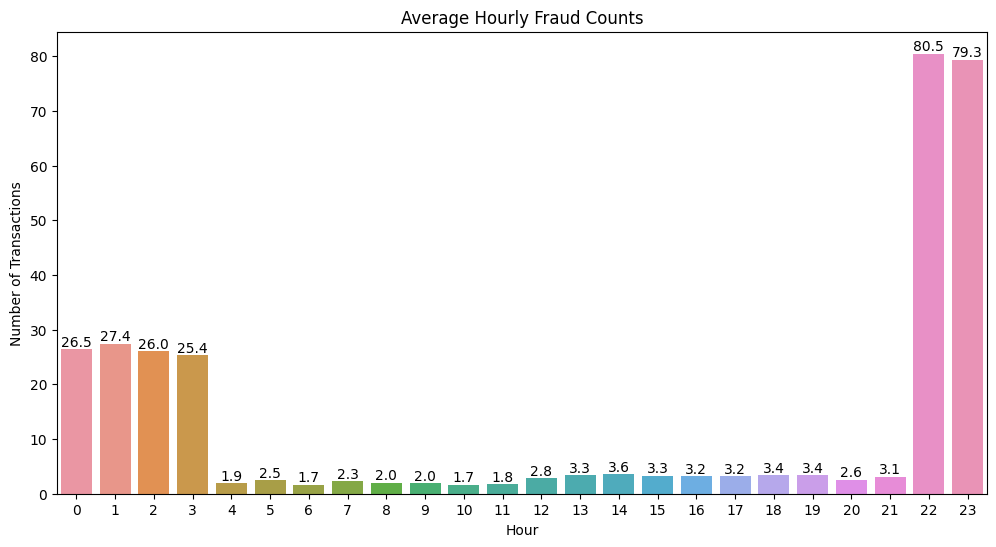

In [12]:
fraud_transactions['hour'] = fraud_transactions['trans_date_trans_time'].dt.hour
hourly_fraud_counts = fraud_transactions['hour'].value_counts().sort_index()
average_hourly_fraud_counts = hourly_fraud_counts / fraud_transactions['hour'].value_counts().count()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_hourly_fraud_counts.index, y=average_hourly_fraud_counts.values)
plt.title('Average Hourly Fraud Counts')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)

for i, count in enumerate(average_hourly_fraud_counts.values):
    plt.text(i, count, f"{count:.1f}", ha='center', va='bottom')

plt.show()

As you can see, a large majority of fraudulent activities occurred **between 22:00 and 03:59**, particularly **between 22:00 and 23:59**.

--

Calculating and visualising the average number of fraud transactions for each day of the week.

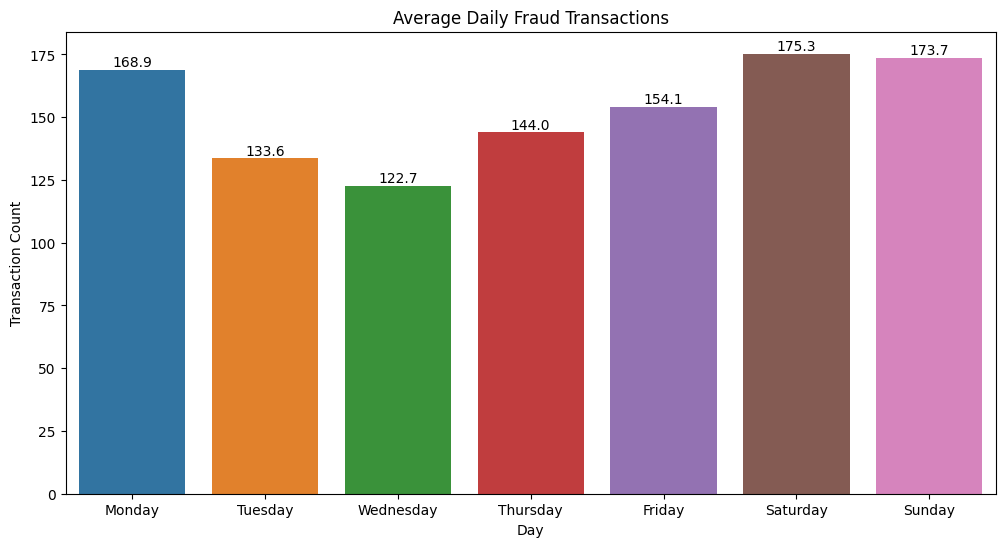

In [13]:
fraud_transactions['weekday'] = fraud_transactions['trans_date_trans_time'].dt.weekday
weekday_fraud_counts = fraud_transactions['weekday'].value_counts().sort_index()
average_weekday_fraud_counts = weekday_fraud_counts / fraud_transactions['weekday'].value_counts().count()
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.barplot(x=average_weekday_fraud_counts.index, y=average_weekday_fraud_counts.values)
plt.title('Average Daily Fraud Transactions')
plt.xlabel('Day')
plt.ylabel('Transaction Count')
plt.xticks(ticks=average_weekday_fraud_counts.index, labels=days_of_week, rotation=0)

# Her çubuğun üzerine ortalama değeri ekle
for i, count in enumerate(average_weekday_fraud_counts.values):
    plt.text(i, count, f"{count:.1f}", ha='center', va='bottom')

plt.show()

# 3. Data Manupilation

## 3.1. Detecting and Removing Outliers

The only numerical value I can use for outlier detection is the transaction amount (`amt`). Other numerical values, such as population, latitude, longitude, etc., do not hold any meaningful statistical significance or distribution in this context.

I will consider data points above a certain `amt` value as outliers and remove them.

To examine the structure of the `amt` column and decide on a suitable threshold, I need to plot a scatterplot.

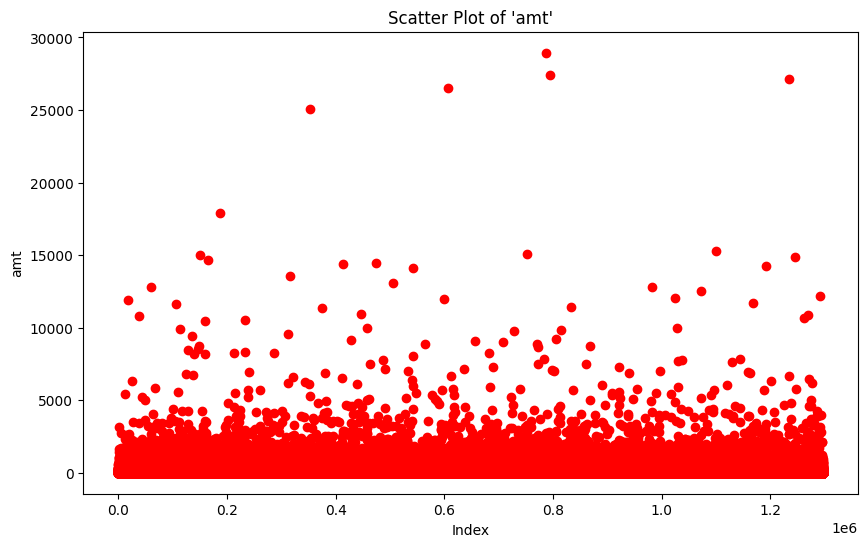

In [14]:
plt.figure(figsize=(10, 6))  
plt.scatter(data.index, data['amt'], color='red') 
plt.title("Scatter Plot of 'amt'")  
plt.xlabel('Index')  
plt.ylabel('amt')  
plt.show()  

Upon visual inspection, it is possible to see that the data points start to disperse after values around 2500 to 3000.

Let's set the threshold at 2700 and visualize the results.

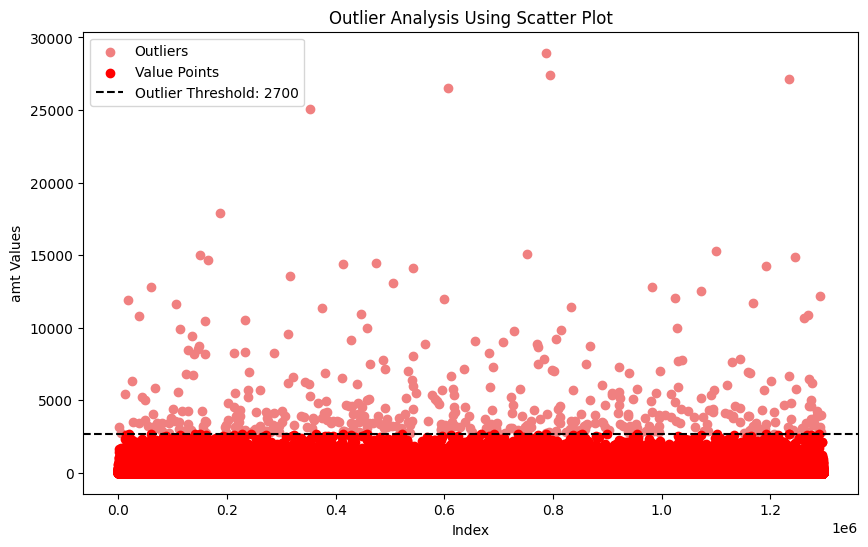

Number of outliers: 430
Outlier percentage: % 0.033161740605780164


In [15]:
outlier_threshold = 2700
outliers = data['amt'] > outlier_threshold
outlier_count = np.count_nonzero(outliers)
total_count = len(data)
outlier_percentage = (outlier_count / total_count) * 100

plt.figure(figsize=(10, 6))
plt.scatter(data.index[outliers], data['amt'][outliers], color='lightcoral', label='Outliers')
plt.scatter(data.index[~outliers], data['amt'][~outliers], color='red', label='Value Points')
plt.axhline(y=outlier_threshold, color='black', linestyle='--', label=f'Outlier Threshold: {outlier_threshold}')
plt.title('Outlier Analysis Using Scatter Plot')
plt.xlabel('Index')
plt.ylabel('amt Values')
plt.legend()
plt.show()


print(f'Number of outliers: {outlier_count}')
print(f'Outlier percentage: % {outlier_percentage}')

I am going to remove all records where the amt value is greater than 2700. Only **430 entries** will be lost, resulting in a **0.03% data loss**. Given the dataset's size, this is not considered a significant loss of data.

In [16]:
data = data[~outliers]

## 3.2. Dropping Unnecessary Features

Let's remove the following columns, as they are not necessary for training our model.

* **`Unnamed: 0`** - It's a unique number similar to an index, which is meaningless for training purposes.
* **`first`**  - The cardholder's first and last names are irrelevant for training purposes.
* **`last`**  - The cardholder's first and last names are irrelevant for training purposes.
* **`street`**  - Since we already have `lat` and `lon` information, we don't need the data in these columns.
* **`city`**  - Since we already have `lat` and `lon` information, we don't need the data in these columns.
* **`state`**  - Since we already have `lat` and `lon` information, we don't need the data in these columns.
* **`zip`**  - Since we already have `lat` and `lon` information, we don't need the data in these columns.
* **`trans_num`**  - It's a unique number for each transaction, which is meaningless for training purposes.
* **`unix_time`**  - We can get the same information from 'trans_date_trans_time' column.
* **`merch_zipcode`**  - Since we already have `lat` and `lon` information, we don't need the data in these columns.

In [17]:
to_drop = ['Unnamed: 0', 'first', 'last', 'street', 'city', 'state', 'zip', 'trans_num','unix_time','merch_zipcode']
data = data.drop(columns=to_drop)

## 3.3. Feature Creation

We need to create the `trans_year`, `trans_month`, `trans_day`, `trans_season`, `trans_weekday`, `trans_hour`, `trans_minute`, and `trans_second` columns using the `trans_date_trans_time` column. Afterwards, we can remove the `trans_date_trans_time` column.

In [18]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_year'] = data['trans_date_trans_time'].dt.year
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_season'] = data['trans_date_trans_time'].dt.month % 12 // 3 + 1  #1 = Winter, 2 = Spring, 3 = Summer, 4 = Autumn
data['trans_weekday'] = data['trans_date_trans_time'].dt.weekday 
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
data['trans_minute'] = data['trans_date_trans_time'].dt.minute
data['trans_second'] = data['trans_date_trans_time'].dt.second

data = data.drop(columns=['trans_date_trans_time'])

Now, let's calculate the cardholder's age at the time the transaction occurred.

In [19]:
data['dob'] = pd.to_datetime(data['dob'])
data['birth_year'] = data['dob'].dt.year
data['card_holder_age'] = data['trans_year'] - data['birth_year']
data = data.drop(columns=['dob', 'birth_year'])

I will calculate the geographical distance between two points using their latitude and longitude coordinates using `geopy` library. The geopy library simplifies calculating geographical distances between points with high precision by providing easy-to-use methods that account for the Earth's curvature.

In [20]:
def calculate_distance(row):
    point_a = (row['lat'], row['long'])
    point_b = (row['merch_lat'], row['merch_long'])
    return geodesic(point_a, point_b).kilometers 

data['distance'] = data.apply(calculate_distance, axis=1)

## 3.4. Encoding

Using `LabelEncoder` to convert categorical features into numerical values for model training.

In [21]:
def encode_categorical_columns(data, columns):
    le = LabelEncoder()
    for col in columns:
        data[col] = le.fit_transform(data[col])
    return data

cat_features = ['cc_num', 'merchant', 'category', 'gender', 'job']
data = encode_categorical_columns(data, cat_features)
data.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_season,trans_weekday,trans_hour,trans_minute,trans_second,card_holder_age,distance
0,444,514,8,4.9700,0,36.0788,-81.1781,3495,370,36.0113,-82.0483,0,2019,1,1,1,1,0,0,18,31,78.7738
1,42,241,4,107.2300,0,48.8878,-118.2105,149,428,49.1590,-118.1865,0,2019,1,1,1,1,0,0,44,41,30.2166
2,237,390,0,220.1100,1,42.1808,-112.2620,4154,307,43.1507,-112.1545,0,2019,1,1,1,1,0,0,51,57,108.1029
3,509,360,2,45.0000,1,46.2306,-112.1138,1939,328,47.0343,-112.5611,0,2019,1,1,1,1,0,1,16,52,95.6851
4,368,297,9,41.9600,1,38.4207,-79.4629,99,116,38.6750,-78.6325,0,2019,1,1,1,1,0,3,6,33,77.7024


## 3.5. Splitting Data Into Train and Test Sets

Let's split the data into training and test sets. To maintain class imbalance in both sets, I will use the `stratify` parameter during the split.

In [22]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1881)

print("y_train class distribution:")
print(y_train.value_counts(normalize=True))


print("\ny_test class distribution:")
print(y_test.value_counts(normalize=True))

y_train class distribution:
is_fraud
0   0.9942
1   0.0058
Name: proportion, dtype: float64

y_test class distribution:
is_fraud
0   0.9942
1   0.0058
Name: proportion, dtype: float64


# 4. Modelling

## 4.1. Model Selection

Here, I specifically defined the **CatBoost**, **XGBooost**, and **LightGBM** models. I tried to optimize the hyperparameters of the models beforehand using Optuna. Later, by tweaking the model's hyperparameters, it may be possible to improve the model's performance.

I defined the `class_weights` object to ensure that each class is equally considered by the model in a dataset with imbalanced class distribution. The `compute_class_weight` function calculates weights based on class frequencies, and these weights are converted into a dictionary. This dictionary is used in the parameters of the `CatBoostClassifier`, `XGBClassifier`, and `LGBMClassifier` models to give more importance to underrepresented classes during the learning process. This approach helps mitigate the negative effects of class imbalance and enhances the overall performance of the model.


In [23]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(enumerate(class_weights))

models = {
    "Catboost": CatBoostClassifier(
        depth=10,
        learning_rate=0.2,
        n_estimators=2000,
        min_child_samples=10,
        subsample=0.7,
        l2_leaf_reg=8,
        cat_features=cat_features,
        random_state=1881,
        eval_metric='F1',
        loss_function='Logloss',
        bootstrap_type='Bernoulli',
        class_weights=class_weights_dict,
        task_type='GPU',
        verbose=False
    ),
    "XGBoost": XGBClassifier(
        max_depth=7,
        learning_rate=0.2,
        n_estimators=2000,
        min_child_weight=10,
        subsample=0.8,
        reg_lambda=1,
        reg_alpha=3,
        scale_pos_weight=class_weights_dict[1] / class_weights_dict[0],
        objective='binary:logistic', 
        eval_metric='logloss',
        tree_method='gpu_hist', 
        random_state=1881,
        verbose=False
    ),
    "LGBM": LGBMClassifier(
        max_depth=8,
        num_leaves=64,
        learning_rate=0.03,
        n_estimators=2000,
        min_child_weight=10,
        subsample=0.9,
        reg_lambda=3,
        reg_alpha=1,
        scale_pos_weight=class_weights_dict[1] / class_weights_dict[0],
        objective='binary',  
        metric='binary_logloss',  
        random_state=1881,
        device="gpu",
        verbose=-1
    )
}

## 4.1. Metric Selection

As previously mentioned, our class variable has a highly imbalanced distribution, making the choice of evaluation metrics crucial for accurately assessing model performance. In this project, we will use the **F1 Score**, **Precision**, and **Recall** as our metrics to effectively capture the model's ability to identify the minority class while minimizing false positives and false negatives. 

The **F1 Score** provides a balance between precision and recall, offering a single measure that reflects both the accuracy of the positive predictions and the model's completeness in identifying all relevant instances. **Precision** measures the proportion of true positive predictions among all positive predictions, indicating how many of the predicted positive cases are actually correct. **Recall**, on the other hand, assesses the model's ability to identify all relevant instances, representing the proportion of true positives among all actual positive cases. By utilizing these metrics, we can better evaluate our model's performance in the context of imbalanced classes.

Here, the training dataset is divided into 5 parts using **stratified k-fold**. Subsequently, the models are tested on each part, and the average **F1 Score**, **Recall**, and **Precision** values for each model are printed. This way, we gain insights into the performance of the models.

In [24]:
results = {
    model_name: {
        "y_tests": [],  
        "y_preds": [],  
        "f1_scores": [],
        "precisions": [],
        "recalls": []
    }
    for model_name in models.keys()
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1881)

for model_name, model in models.items():
    for train_index, test_index in skf.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        
        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_test_fold)

        f1 = f1_score(y_test_fold, y_pred_fold)
        precision = precision_score(y_test_fold, y_pred_fold)
        recall = recall_score(y_test_fold, y_pred_fold)
        
        results[model_name]["y_tests"].append(y_test_fold)
        results[model_name]["y_preds"].append(y_pred_fold)
        results[model_name]["f1_scores"].append(f1)
        results[model_name]["precisions"].append(precision)
        results[model_name]["recalls"].append(recall)
        
average_results = {
    "Model": [],
    "Mean F1 Score": [],
    "Mean Precision": [],
    "Mean Recall": []
}

for model_name, metrics in results.items():
    average_results["Model"].append(model_name)
    average_results["Mean F1 Score"].append(sum(metrics["f1_scores"]) / len(metrics["f1_scores"]))
    average_results["Mean Precision"].append(sum(metrics["precisions"]) / len(metrics["precisions"]))
    average_results["Mean Recall"].append(sum(metrics["recalls"]) / len(metrics["recalls"]))

df_results = pd.DataFrame(average_results)
df_results

1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


,Model,Mean F1 Score,Mean Precision,Mean Recall
0,Catboost,0.9161,0.9338,0.8991
1,XGBoost,0.8926,0.8925,0.8928
2,LGBM,0.8812,0.8603,0.9032


## 4.3. Ensembling Catboost, XGBoost and LightGBM

As observed, the performance of all three models is relatively good. Now, let's combine all the models using a **soft voting ensemble model** and train it on the training dataset. Afterwards, we will evaluate the performance of the new model on the test dataset.

In [25]:
voting_clf = VotingClassifier(
    estimators=[
        ('Catboost', models["Catboost"]),
        ('XGBoost', models["XGBoost"]),
        ('LGBM', models["LGBM"])
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

In [26]:
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

metrics = {
    'Metric': ['F1 Score', 'Precision', 'Recall'],
    'Value': [f1, precision, recall]
}

metrics_df = pd.DataFrame(metrics)
metrics_df

,Metric,Value
0,F1 Score,0.9215
1,Precision,0.9319
2,Recall,0.9114


Visualising the confusion matrix of the final model.

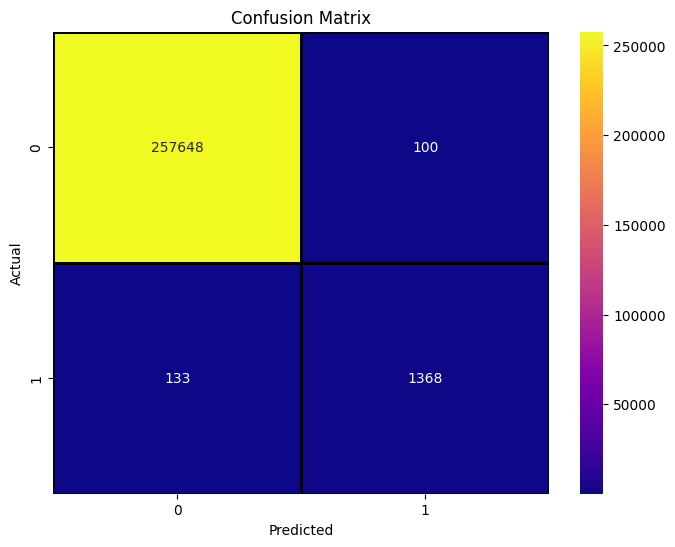

In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', cbar=True, linewidths=1, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Here is the classification report of the final model.

In [28]:
clf_report = classification_report(y_test, y_pred, output_dict=True)
rep_df = pd.DataFrame(clf_report).transpose()
rep_df

,precision,recall,f1-score,support
0,0.9995,0.9996,0.9995,257748.0000
1,0.9319,0.9114,0.9215,1501.0000
accuracy,0.9991,0.9991,0.9991,0.9991
macro avg,0.9657,0.9555,0.9605,259249.0000
weighted avg,0.9991,0.9991,0.9991,259249.0000


## 4.4. Feature Importances

Calculating and visualising the average feature importances from three machine learning models (CatBoost, XGBoost, and LGBM) to identify the top 10 most important features influencing the model predictions by creating a bar plot for better interpretation of which features are most impactful.

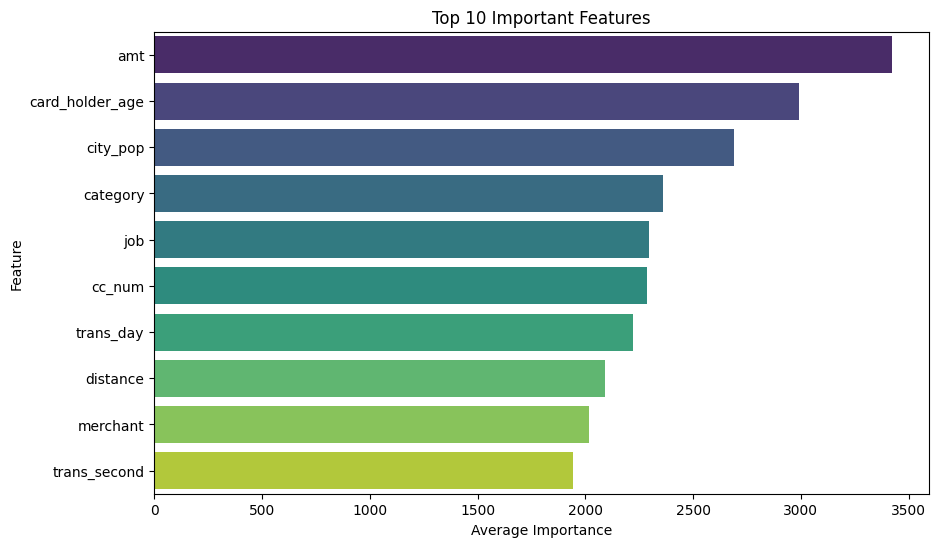

In [29]:
catboost_importance = models['Catboost'].feature_importances_
xgboost_importance = models['XGBoost'].feature_importances_
lgbm_importance = models['LGBM'].feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'CatBoost': catboost_importance,
    'XGBoost': xgboost_importance,
    'LGBM': lgbm_importance
})
importance_df['Average'] = importance_df[['CatBoost', 'XGBoost', 'LGBM']].mean(axis=1)
top_features = importance_df.nlargest(10, 'Average')

plt.figure(figsize=(10, 6))
sns.barplot(x='Average', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Average Importance')
plt.ylabel('Feature')
plt.show()

# 5. Conclusion

This project aimed to detect credit card fraud using machine learning techniques. To achieve this I used three different machine learning models: CatBoost, XGBoost, and LightGBM. These models were then combined using a voting ensemble method to create the final model. The performance of the final model was promising, achieving an F1 Score of **%92**, Precision of **%93**, and Recall of **%91**. Additionally, I identified the top 10 features contributing to the model's predictions, highlighting their significance in fraud detection.

**Next Steps**

1. **Further Model Optimization**: While the final model demonstrates good performance, additional optimization techniques such as more extensive hyperparameter tuning could further enhance its performance.

2. **Feature Engineering**: Investigating additional features or transformations of existing features could provide new insights and improve model performance.

3. **Real-World Testing**: Deploying the model in a real-world scenario and monitoring its performance over time will help assess its effectiveness and adaptability to new data patterns.

4. **Model Interpretability**: Implementing model interpretation techniques, such as SHAP (SHapley Additive exPlanations), can help in understanding the model's decision-making process and building trust with stakeholders.

5. **Exploration of Alternative Models**: Experimenting with other machine learning algorithms or deep learning approaches may yield better results or offer complementary insights.

6. **Regular Updates**: Establishing a pipeline for regularly updating the model with new data will ensure its ongoing effectiveness in detecting fraudulent activities.

By pursuing these next steps, the model can be further refined and its ability to combat credit card fraud effectively enhanced.